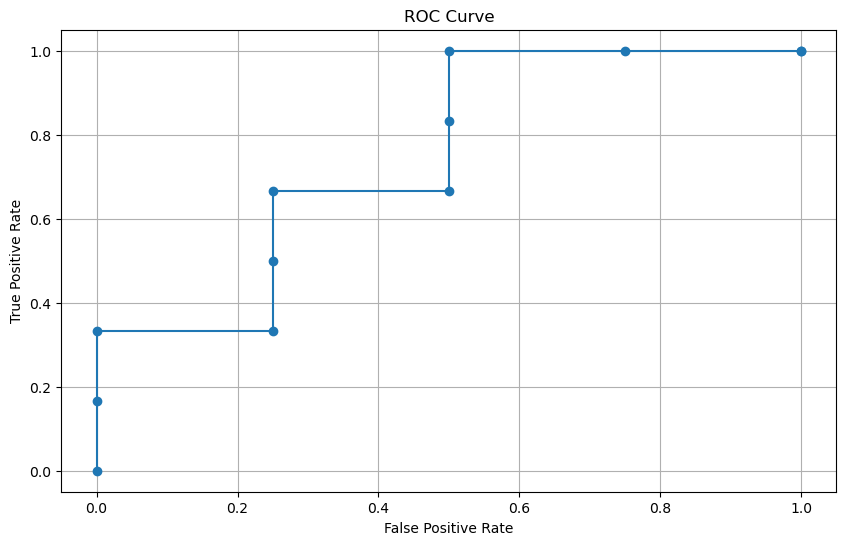

In [3]:
import matplotlib.pyplot as plt

confidence_scores = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
actual_class = ['+', '+', '-', '+', '+', '-', '+', '+', '-', '-']

sorted_data = sorted(zip(confidence_scores, actual_class), reverse=True)

TPR = []  
FPR = []  
TP = FP = TN = FN = 0  

# Calculate TPR and FPR for each threshold
for score, actual in sorted_data:
    if actual == '+':
        TP += 1
    else:
        FP += 1
    FN = sum(1 for _, a in sorted_data if a == '+' and _ < score)
    TN = sum(1 for _, a in sorted_data if a == '-' and _ < score)
    
    tpr = TP / (TP + FN) if TP + FN != 0 else 0
    fpr = FP / (FP + TN) if FP + TN != 0 else 0
    
    TPR.append(tpr)
    FPR.append(fpr)

TPR = [0] + TPR + [1]
FPR = [0] + FPR + [1]

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(FPR, TPR, marker='o')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('ROC curve')
plt.grid()
plt.show()
